In [104]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import numpy as np

# EDA Univariada
## Hstogramas normalizados + KDE para X1–X8 e Y1/Y2, mapeando picos, modalidades e caudas.

In [106]:
# Dataset pode ser encontrado em: https://archive.ics.uci.edu/dataset/242/energy+efficiency
df = pd.read_excel("ENB2012_data.xlsx")

"""
Descrição do conjunto de dados:
O dataset contém 768 amostras de edifícios, com as seguintes características:
• Variáveis de entrada: Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution
• Variáveis de saída (dupla saída): Heating Load (Carga de aquecimento), Cooling Load (Carga de resfriamento)

Alterando nome das colunas para melhor compreensão
"""
df.columns = [
    "X1_compactness", "X2_surface_area", "X3_wall_area", "X4_roof_area",
    "X5_height", "X6_orientation", "X7_glazing_area", "X8_glazing_dist",
    "Y1_heating_load", "Y2_cooling_load"
]
df

,X1_compactness,X2_surface_area,X3_wall_area,X4_roof_area,X5_height,X6_orientation,X7_glazing_area,X8_glazing_dist,Y1_heating_load,Y2_cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Contínuas: X1–X5, X7, Y1, Y2

Discretas: X6, X8


In [107]:
df.describe()

,X1_compactness,X2_surface_area,X3_wall_area,X4_roof_area,X5_height,X6_orientation,X7_glazing_area,X8_glazing_dist,Y1_heating_load,Y2_cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Dataset não tem dados faltantes, apesar de alguns valores zerados nas colunas X7_glazing_area e X8_glazing_dist

In [108]:
df.loc[df['X7_glazing_area'] == 0].describe()
# df.loc[df['X8_glazing_dist'] == 0].describe()

,X1_compactness,X2_surface_area,X3_wall_area,X4_roof_area,X5_height,X6_orientation,X7_glazing_area,X8_glazing_dist,Y1_heating_load,Y2_cooling_load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286375,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625329,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


Quando X7 é 0, X8 também é 0.

Da pra assumir que não existe glazing area quando qualquer uma das variáveis for 0.

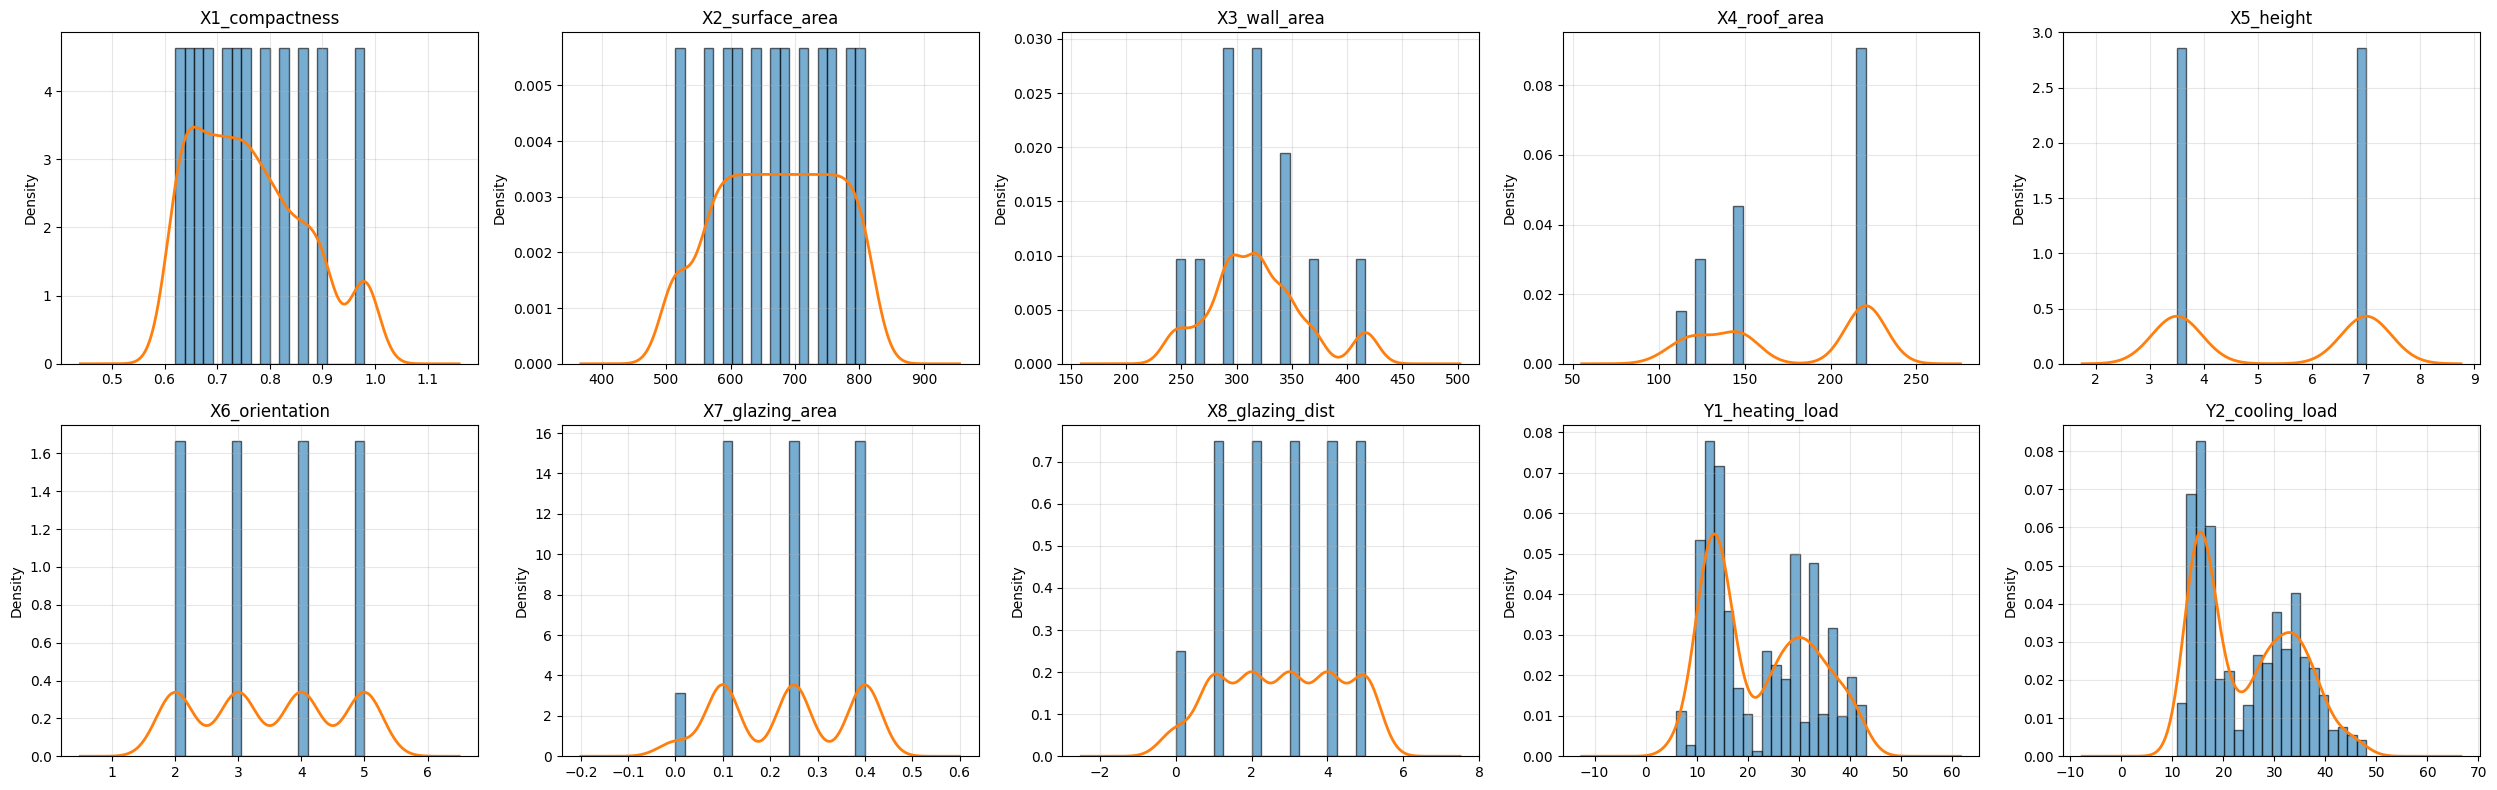

In [109]:
cols = df.columns.tolist()

n_vars = len(cols)
n_cols = 5
n_rows = (n_vars + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

#Histograma normalizado pra enxergar melhor a densidade com a curva KDE
for ax, col in zip(axes, cols):
    df[col].plot.hist(
        bins=20, density=True, alpha=0.6, edgecolor='black', ax=ax
    )

    df[col].plot.kde(linewidth=2, ax=ax)
    ax.set_title(col)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Existe uma assimetria em Y1_heating_load e Y2_cooling_load com caudas a direita (Valores altos com pouca frequência no lado direito)  ([Conteúdo](https://ead.uepg.br/apl/sigma/assets/editais/PS0027E0035.pdf))


Vai ser necessário aplicar log(y) em Y1 e Y2 para utilizar modelos mais simples como LinearRegression (Assume que os dados são distribuídos normalmente), fazendo isso evita que casos mais raros, como os de 60kW + dominem o aprendizado do modelo. [Conteúdo](https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model)


# EDA Multivariada

Cria matriz simétrica de correlações de Pearson entre todas as variáveis [Correlação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

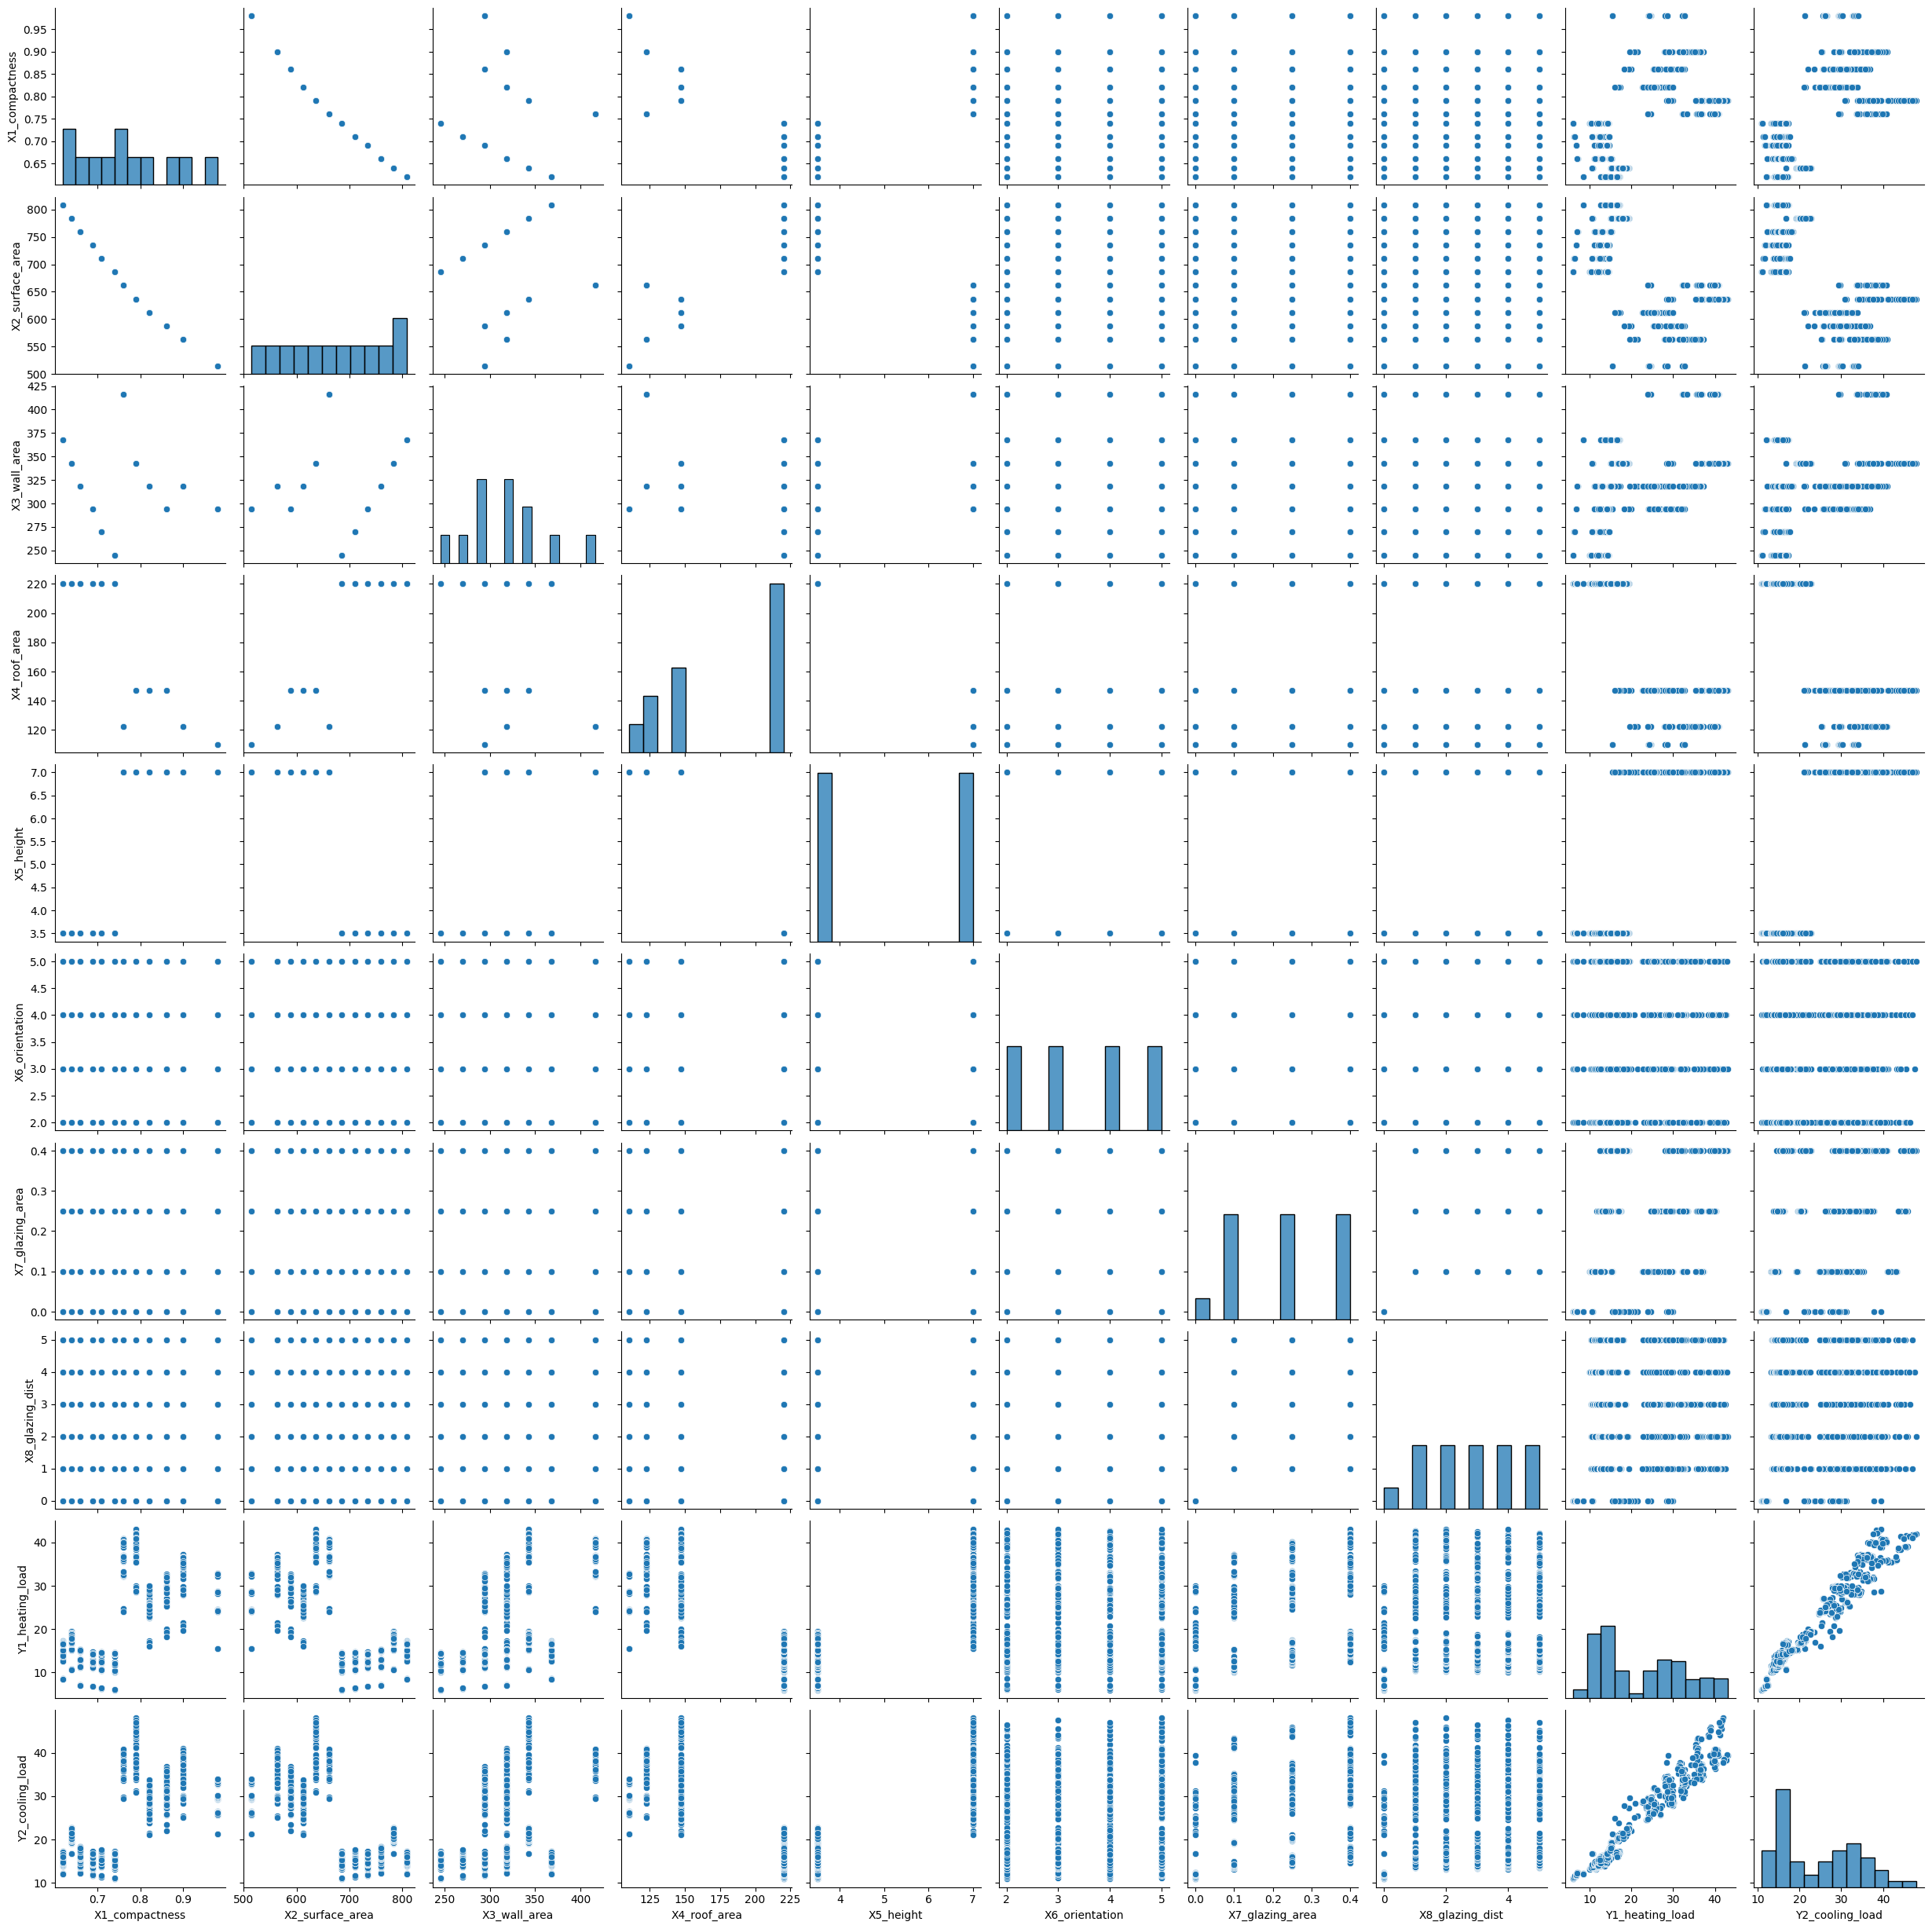

In [110]:
sns.pairplot(df)
plt.show()

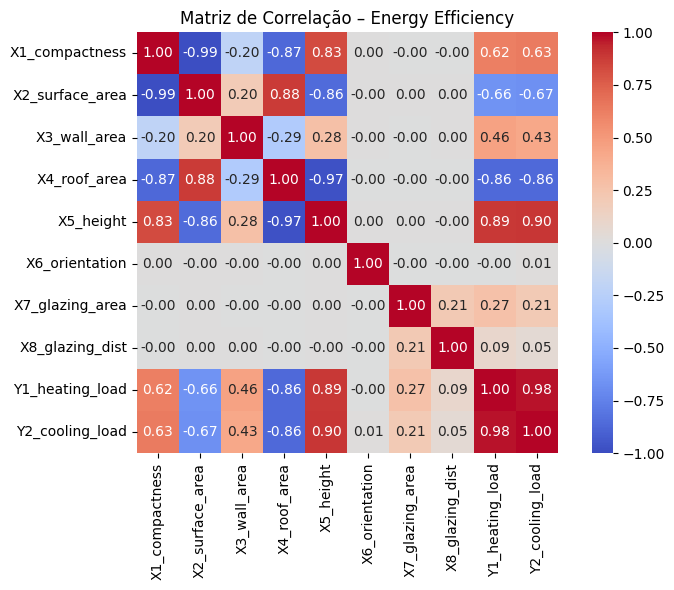

In [111]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            vmin=-1, vmax=1,
            annot=True, fmt=".2f",
            cmap="coolwarm",
            square=True)
plt.title("Matriz de Correlação – Energy Efficiency")
plt.tight_layout()
plt.show()


## Correlações: ```-1 ~ 0 ~ 1```

##Variáveis de Entrada:
- X1_compactness ↔ X2_surface_area (r ≈ –0.99)

- X2_surface_area ↔ X4_roof_area (r ≈ +0.88)

- X4_roof_area ↔ X5_height (r ≈ –0.97)

- X1_compactness ↔ X5_height (r ≈ +0.83)

## Variáveis de Saída:
### Y1_heating_load e Y2_cooling_load:
 - X5_height -> 0.89 | 0.90- Altura do prédio tem impacto positivo forte na carga.

 - X4_roof_area -> -0.86 - Tamanho da área do telhado tem impacto negativo forte na carga.

 - x1_compactness -> +0.62 | +0.63 - Maior "compactness", maior volume, exigindo mais carga.

 - X2_surface_area -> -0.66 - Aumento de X2 reduz X1(-0.99) e reduzir X1 implica em Y diminuir por causa de sua correlação positiva, então, quanto maior superfície de área menor compactness, logo, menos carga.

- X3_wall_area -> 0.46 | 0.43	- Impacto moderado mais parede, mais carga devido a troca de calor.

Conclusão:

Alta correlação entre algumas variáveis de entrada, necessário realizar _feature selection_.
Ideia inicial seria usar PCA para combiná-las, mas no caso de X1_compactness ↔ X2_surface_area por ser -0.99 uma delas pode ser eliminada.

# Detecção de outliers
## IQR e Zscore
[Medium](https://medium.com/@aakash013/outlier-detection-treatment-z-score-iqr-and-robust-methods-398c99450ff3)

In [112]:
def detect_outliers_iqr(df, cols):
    outlier_indices = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()
        print(f"{col}: {len(outliers)} outliers")
    return outlier_indices

cont_vars = [col for col in df.columns if col.startswith('X') or col.startswith('Y')]
iqr_outliers = detect_outliers_iqr(df, cont_vars)

X1_compactness: 0 outliers
X2_surface_area: 0 outliers
X3_wall_area: 0 outliers
X4_roof_area: 0 outliers
X5_height: 0 outliers
X6_orientation: 0 outliers
X7_glazing_area: 0 outliers
X8_glazing_dist: 0 outliers
Y1_heating_load: 0 outliers
Y2_cooling_load: 0 outliers


In [113]:
def detect_outliers_zscore(df, cols, threshold=3):
    z_outliers = {}
    z_scores = np.abs(zscore(df[cols]))
    for idx, col in enumerate(cols):
        outliers = df[z_scores[:, idx] > threshold]
        z_outliers[col] = outliers.index.tolist()
        print(f"{col}: {len(outliers)} outliers (Z-score > {threshold})")
    return z_outliers

# Exemplo de uso:
zscore_outliers = detect_outliers_zscore(df, cont_vars)

X1_compactness: 0 outliers (Z-score > 3)
X2_surface_area: 0 outliers (Z-score > 3)
X3_wall_area: 0 outliers (Z-score > 3)
X4_roof_area: 0 outliers (Z-score > 3)
X5_height: 0 outliers (Z-score > 3)
X6_orientation: 0 outliers (Z-score > 3)
X7_glazing_area: 0 outliers (Z-score > 3)
X8_glazing_dist: 0 outliers (Z-score > 3)
Y1_heating_load: 0 outliers (Z-score > 3)
Y2_cooling_load: 0 outliers (Z-score > 3)
